In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [24]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

In [25]:
df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States') & (df['salary_year_avg'].notna())].copy()

In [ ]:
job_list = [df_us[df_us['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

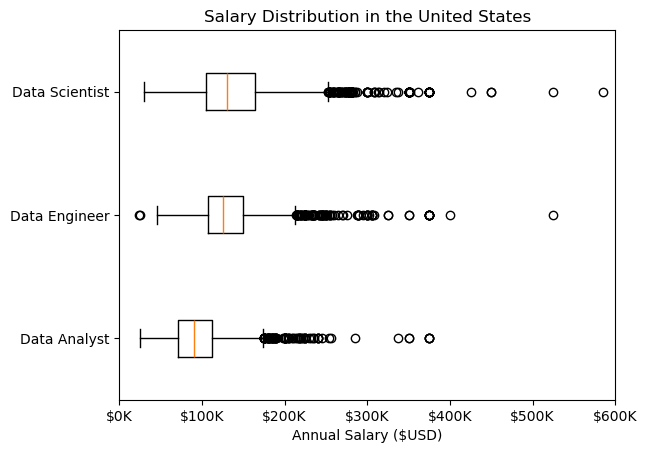

In [30]:
from matplotlib.ticker import FuncFormatter
#df_da_us['salary_year_avg'].plot(kind='box', vert=False)
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"${int(x/1000)}K"))
plt.xlim((0,600_000))
plt.xlabel('Annual Salary ($USD)')
plt.title("Salary Distribution in the United States")
plt.show()